In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('bikeshare2017.csv')

In [3]:
df.dtypes

Bike ID                    float64
Birth Year                 float64
End Station ID             float64
End Station Latitude       float64
End Station Longitude      float64
End Station Name            object
Gender                     float64
Start Station ID           float64
Start Station Latitude     float64
Start Station Longitude    float64
Start Station Name          object
Start Time                  object
Stop Time                   object
Trip Duration              float64
User Type                   object
dtype: object

In [13]:
#Looking at trips that were longer than a week in 2017:
df[df['Trip Duration'] > 604800]['Start Station Name'].value_counts()

Fulton St & Utica Ave               51
Humboldt St & Varet St              27
Lewis Ave & Madison St              25
Kingston Ave & Herkimer St          24
Lewis Ave & Kosciuszko St           24
Halsey St & Tompkins Ave            20
Macon St & Nostrand Ave             18
Myrtle Ave & Lewis Ave              16
Albany Ave & Fulton St              15
Verona Pl & Fulton St               15
Pulaski St & Marcus Garvey Blvd     13
S 4 St & Rodney St                  13
Grand Army Plaza & Plaza St West    12
Atlantic Ave & Fort Greene Pl       12
Broadway & Whipple St               11
Marcus Garvey Blvd & Macon St       11
Plaza St West & Flatbush Ave        10
Putnam Ave & Throop Ave              9
Brooklyn Bridge Park - Pier 2        9
Lawrence St & Willoughby St          8
Greene Ave & Throop Ave              8
Stagg St & Union Ave                 8
Putnam Ave & Nostrand Ave            7
S 5 Pl & S 4 St                      7
Hancock St & Bedford Ave             6
Fulton St & Adams St     

In [14]:
#Quite a few are recovered and checked in at the Depots.
df[df['Trip Duration'] > 604800]['End Station Name'].value_counts()

NYCBS Depot - GOW                                254
NYCBS DEPOT - DELANCEY                           107
NYCBS Depot - PIT                                 62
Fulton St & Utica Ave                             24
NYCBS Depot - SSP                                 24
E 97 St & Madison Ave                             14
Lewis Ave & Kosciuszko St                         13
Myrtle Ave & Lewis Ave                            12
Humboldt St & Varet St                             9
31 St & Broadway                                   8
Kingston Ave & Herkimer St                         7
Carlton Ave & Park Ave                             6
Tompkins Ave & Hopkins St                          6
Lewis Ave & Madison St                             6
Myrtle Ave & Marcy Ave                             6
Halsey St & Tompkins Ave                           6
Pulaski St & Marcus Garvey Blvd                    6
Throop Ave & Myrtle Ave                            5
Broadway & Whipple St                         

In [18]:
#let's also explore the age groups.
df['Birth Year'].value_counts()

1989.0    637995
1988.0    633159
1990.0    622527
1986.0    612018
1987.0    610337
1985.0    606735
1991.0    570175
1984.0    561343
1983.0    524858
1992.0    514374
1982.0    488489
1981.0    454627
1993.0    420400
1980.0    415692
1979.0    385603
1978.0    355898
1977.0    333570
1976.0    328303
1970.0    316266
1974.0    304797
1975.0    302246
1971.0    293325
1969.0    286184
1973.0    280427
1972.0    279730
1994.0    272759
1968.0    259272
1967.0    237467
1965.0    229773
1964.0    225373
           ...  
1933.0       385
1899.0       346
1910.0       337
1912.0       262
1917.0       254
1887.0       246
1926.0       233
1893.0       196
1929.0       185
1918.0       162
1921.0       146
1894.0       128
1886.0       125
1927.0       121
1895.0        89
1930.0        78
1928.0        69
1888.0        54
1907.0        44
1913.0        39
1915.0        32
1916.0        31
1896.0        23
1920.0        11
1889.0        10
1890.0         9
1874.0         6
1905.0        

In [19]:
#HT to whoever has 1858 on their citibike account.
df.head()

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
0,25542.0,1965.0,3165.0,40.775794,-73.976206,Central Park West & W 72 St,2.0,3226.0,40.782750,-73.971370,W 82 St & Central Park West,2017-01-01 00:00:21,2017-01-01 00:11:41,680.0,Subscriber
1,21136.0,1987.0,498.0,40.748549,-73.988084,Broadway & W 32 St,2.0,3263.0,40.729236,-73.990868,Cooper Square & E 7 St,2017-01-01 00:00:45,2017-01-01 00:22:08,1282.0,Subscriber
2,18147.0,NaN,3152.0,40.768737,-73.961199,3 Ave & E 71 St,0.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:00:57,2017-01-01 00:11:46,648.0,Customer
3,21211.0,NaN,3152.0,40.768737,-73.961199,3 Ave & E 71 St,0.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:01:10,2017-01-01 00:11:42,631.0,Customer
4,26819.0,NaN,3152.0,40.768737,-73.961199,3 Ave & E 71 St,0.0,3143.0,40.776829,-73.963888,5 Ave & E 78 St,2017-01-01 00:01:25,2017-01-01 00:11:47,621.0,Customer


In [21]:
df.Gender.value_counts()

1.0    11167755
2.0     3776282
0.0     1715548
Name: Gender, dtype: int64

In [25]:
df.groupby('Gender')['Trip Duration'].mean()

Gender
0.0    1890.959271
1.0     848.380538
2.0     999.838675
Name: Trip Duration, dtype: float64

In [26]:
#Huh, why is the 0 (Unknown) so much higher?
df.groupby('User Type')['Trip Duration'].mean()


User Type
Customer      2513.203902
Subscriber     806.533014
Name: Trip Duration, dtype: float64

In [31]:
#So here we compare the genders and if the ride was done by a subscriber or customer.
df.groupby(['User Type', 'Gender'])['Trip Duration'].mean()

User Type   Gender
Customer    0.0       2049.758730
            1.0       5018.476244
            2.0       4212.791753
Subscriber  0.0        915.791964
            1.0        774.044324
            2.0        896.806349
Name: Trip Duration, dtype: float64

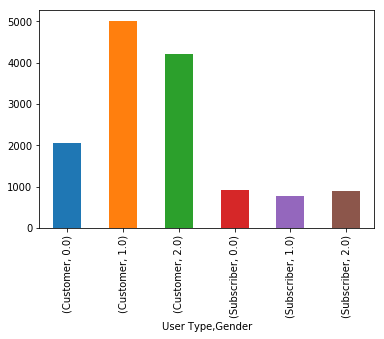

In [29]:
df.groupby(['User Type', 'Gender'])['Trip Duration'].mean().plot(kind='bar')

In [33]:
df['Start Station Name'].value_counts().head() #Most popular places to start

Pershing Square North    162716
E 17 St & Broadway       112218
Broadway & E 22 St       108590
W 21 St & 6 Ave          107133
West St & Chambers St    105610
Name: Start Station Name, dtype: int64

In [34]:
df['End Station Name'].value_counts().head() #Most popular places to end

Pershing Square North    160387
E 17 St & Broadway       117318
Broadway & E 22 St       116509
West St & Chambers St    114518
W 21 St & 6 Ave          108458
Name: End Station Name, dtype: int64

In [35]:
#And, maybe the story here is about a bike and not people. What is the most popular citibike in NYC,
#and where have they been?
df['Bike ID'].value_counts().head()

25738.0    2514
25275.0    2409
27161.0    2376
26565.0    2370
27111.0    2349
Name: Bike ID, dtype: int64

In [38]:
#Why hello bike 25738.0. Let's find out more about you.
df[df['Bike ID'] == 25738.0]

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
1001,25738.0,1985.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,1.0,3140.0,40.771404,-73.953517,1 Ave & E 78 St,2017-01-01 03:04:00,2017-01-01 03:06:43,163.0,Subscriber
1907,25738.0,1952.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,1.0,3148.0,40.775655,-73.950686,E 84 St & 1 Ave,2017-01-01 09:19:49,2017-01-01 09:26:46,416.0,Subscriber
2634,25738.0,1962.0,520.0,40.759923,-73.976485,W 52 St & 5 Ave,2.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 10:42:20,2017-01-01 11:04:05,1304.0,Subscriber
4508,25738.0,1962.0,3142.0,40.761227,-73.960940,1 Ave & E 62 St,2.0,520.0,40.759923,-73.976485,W 52 St & 5 Ave,2017-01-01 12:35:28,2017-01-01 12:44:34,545.0,Subscriber
5813,25738.0,1962.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2.0,3142.0,40.761227,-73.960940,1 Ave & E 62 St,2017-01-01 13:31:16,2017-01-01 13:42:34,677.0,Subscriber
8007,25738.0,1990.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,1.0,3150.0,40.775369,-73.948034,E 85 St & York Ave,2017-01-01 14:49:19,2017-01-01 14:52:12,172.0,Subscriber
10996,25738.0,1983.0,3282.0,40.783070,-73.959390,5 Ave & E 88 St,1.0,3147.0,40.778012,-73.954071,E 85 St & 3 Ave,2017-01-01 16:36:02,2017-01-01 16:43:12,429.0,Subscriber
12566,25738.0,1986.0,499.0,40.769155,-73.981918,Broadway & W 60 St,2.0,3282.0,40.783070,-73.959390,5 Ave & E 88 St,2017-01-01 17:55:17,2017-01-01 18:11:38,980.0,NaN
13732,25738.0,1986.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2.0,499.0,40.769155,-73.981918,Broadway & W 60 St,2017-01-01 19:14:53,2017-01-01 19:37:30,1356.0,Subscriber
19931,25738.0,1990.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,1.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2017-01-02 12:48:15,2017-01-02 15:35:37,10042.0,Subscriber


In [40]:
#What's the longest trip you've been on?
df[df['Bike ID'] == 25738.0].sort_values('Trip Duration', ascending=False)

,Bike ID,Birth Year,End Station ID,End Station Latitude,End Station Longitude,End Station Name,Gender,Start Station ID,Start Station Latitude,Start Station Longitude,Start Station Name,Start Time,Stop Time,Trip Duration,User Type
9096503,25738.0,1970.0,317.0,40.724537,-73.981854,E 6 St & Avenue B,1.0,236.0,40.728419,-73.987140,St Marks Pl & 2 Ave,2017-08-10 13:41:09,2017-08-13 18:05:34,275064.0,Subscriber
14014182,25738.0,1970.0,312.0,40.722055,-73.989111,Allen St & Stanton St,1.0,356.0,40.716226,-73.982612,Bialystoker Pl & Delancey St,2017-10-28 18:26:17,2017-10-29 10:28:46,57749.0,Subscriber
7494877,25738.0,NaN,439.0,40.726281,-73.989780,E 4 St & 2 Ave,0.0,486.0,40.746201,-73.988557,Broadway & W 29 St,2017-07-13 17:29:29,2017-07-14 09:13:03,56613.0,Customer
8452496,25738.0,NaN,3063.0,40.695270,-73.952381,Nostrand Ave & Myrtle Ave,0.0,144.0,40.698399,-73.980689,Nassau St & Navy St,2017-07-30 14:18:30,2017-07-30 17:57:11,13121.0,Customer
5236965,25738.0,NaN,304.0,40.704633,-74.013617,Broadway & Battery Pl,0.0,540.0,40.743116,-73.982154,Lexington Ave & E 29 St,2017-06-03 13:10:16,2017-06-03 16:22:15,11519.0,Customer
19931,25738.0,1990.0,3177.0,40.786795,-73.977112,W 84 St & Broadway,1.0,3307.0,40.794165,-73.974124,West End Ave & W 94 St,2017-01-02 12:48:15,2017-01-02 15:35:37,10042.0,Subscriber
6689146,25738.0,1984.0,417.0,40.712912,-74.010202,Barclay St & Church St,2.0,490.0,40.751551,-73.993934,8 Ave & W 33 St,2017-06-28 21:27:34,2017-06-28 23:50:44,8589.0,Customer
1742252,25738.0,1967.0,3255.0,40.750585,-73.994685,8 Ave & W 31 St,2.0,238.0,40.736197,-74.008592,Bank St & Washington St,2017-03-08 15:37:16,2017-03-08 17:28:57,6700.0,Subscriber
13406171,25738.0,NaN,281.0,40.764397,-73.973715,Grand Army Plaza & Central Park S,0.0,2006.0,40.765909,-73.976342,Central Park S & 6 Ave,2017-10-19 15:23:39,2017-10-19 17:15:04,6684.0,Customer
4585700,25738.0,1997.0,3163.0,40.773407,-73.977825,Central Park West & W 68 St,1.0,167.0,40.748901,-73.976049,E 39 St & 3 Ave,2017-05-21 05:42:31,2017-05-21 07:26:02,6210.0,Customer
